# Problem Statement: 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.


Also, determine the optimal value of lambda for ridge and lasso regression. 

# Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
housing = pd.read_csv("train.csv")

In [4]:
# Check the head of the dataset
housing

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [5]:
housing.shape

(1460, 81)

In [6]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
housing.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualising Numeric Variables
### Observing the Scatter Plot between Above Ground Living Area and the House prices

Text(0.5, 1.0, 'Sq. Ft. vs. Sales Price of Houses in Australia')

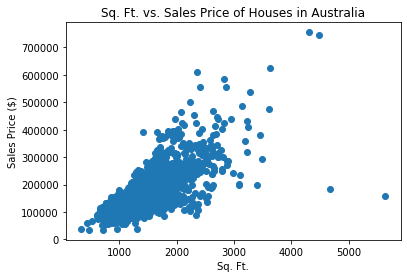

In [9]:
#GrLivArea vs. SalePrice
plt.scatter(housing['GrLivArea'], housing['SalePrice'])
plt.xlabel('Sq. Ft.')
plt.ylabel('Sales Price ($)')
plt.title('Sq. Ft. vs. Sales Price of Houses in Australia')

Here we observe that there are two points beyond 4000, which have Sales price of approx. $200,000 . These points should be removed as these are high leverage points.

In [10]:
#remove high leverage points
housing = housing[housing['GrLivArea'] < 4000]
housing.shape


(1456, 81)

As we can observe from the shape above, all the 4 points beyond 4000 , were removed

### Lets observe the distribution of Sales Price data now.

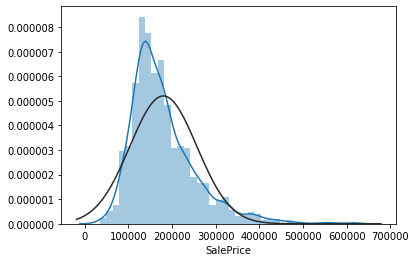

In [11]:
# Normal Distribution of the Sales Price
from scipy import stats
from scipy.stats import skew, norm
sns.distplot(housing['SalePrice'], fit=norm);
plt.show()


As we can see above the data is not normally distributed. We will be doing the log transformation inorder to fix this.

In [12]:
housing['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1456, dtype: int64

In [13]:
#log transform SalePrice 
housing_lg= housing
housing_lg['SalePrice'] = np.log1p(housing_lg['SalePrice'])
housing_lg['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1456, dtype: float64

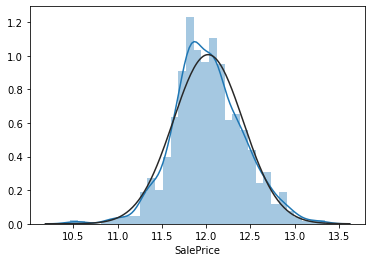

In [14]:
y = housing_lg['SalePrice']
#Replot data
sns.distplot(housing_lg['SalePrice'], fit=norm);
plt.show()


Now if we see , our target variable is more or less normalized

# Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

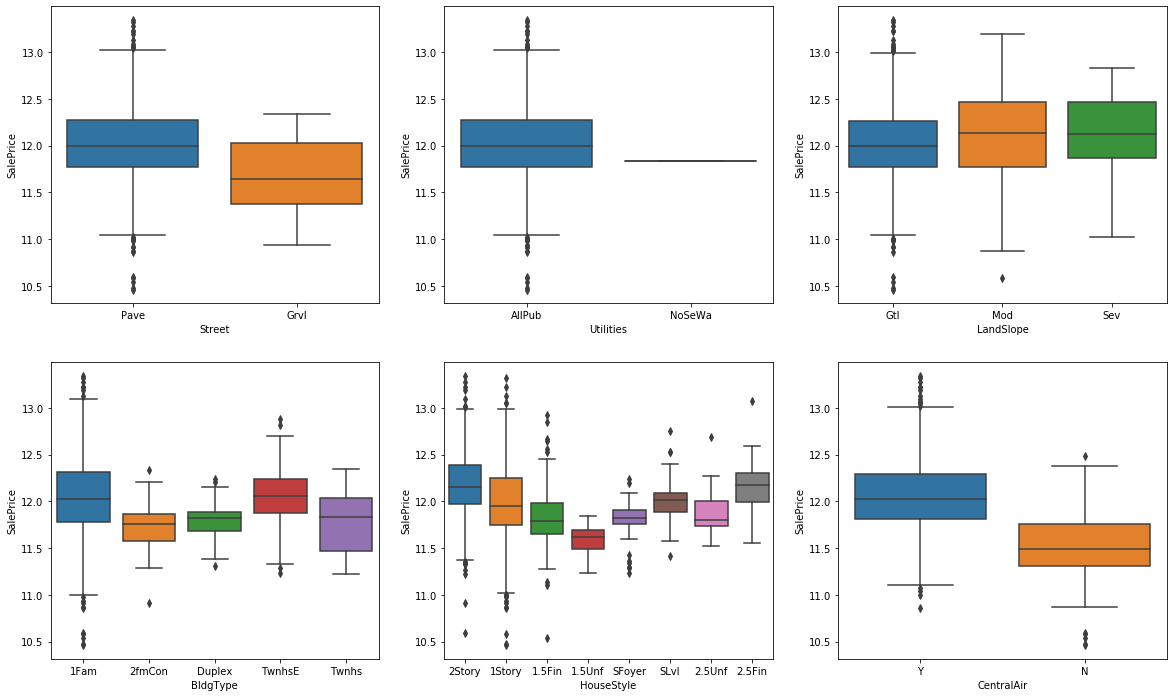

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Street', y = 'SalePrice', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = housing)
plt.show()

# Step 3: Data Preparation
Data Cleaning is one of the most important step in a dataset like this. There are various columnar data , which need to be made numeric for analysis, as well as there are certain data such as Month Sold (MoSold) which needs to be in Categorial form.

In [16]:
#Change Categorical to Numeric
housing = housing.replace({'Street' : {'Grvl' : 1, 'Pave' : 2},
                       'Alley' : {'Grvl' : 1, 'Pave' : 2},
                       'LotShape' : {'IR3' : 1, 'IR2' : 1, 'IR1' : 2, 'Reg' : 3},
                       'LandCountour': {'Low' : 1, 'HLS' : 2, 'Bnk' : 2, 'Lvl' : 3},
                       'Utilities' : {'ELO' : 1, 'NoSeWa' : 2, 'NoSewr' : 2, 'AllPub' : 3},
                       'LandSlope' : {'Sev' : 1, 'Mod' : 2, 'Gtl' : 3},
                       'BsmtExposure' : {'No' : 1, 'Mn' : 2, 'Av': 3, 'Gd' : 4},
                       'BsmtFinType1' : {'Unf' : 1, 'LwQ': 2, 'Rec' : 3, 'BLQ' : 4, 
                                         'ALQ' : 5, 'GLQ' : 6},
                       'BsmtFinType2' : {'Unf' : 1, 'LwQ': 2, 'Rec' : 3, 'BLQ' : 4, 
                                         'ALQ' : 5, 'GLQ' : 6},
                       'Functional' : {'Sal' : 1, 'Sev' : 2, 'Maj2' : 3, 'Maj1' : 4, 'Mod': 5, 
                                       'Min2' : 6, 'Min1' : 7, 'Typ' : 8},
                       'GarageFinish' : {'Unf' : 1, 'RFn' : 2, 'Fin' : 3},
                       'PavedDrive' : {'N' : 1, 'P' : 2, 'Y' : 3},
                       'PoolQC' : {'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4},
                       'Fence' : {'GdPrv' : 2, 'MnPrv' : 1, 'GdWo' : 2, 'MnWw' : 1},
                       'MiscFeature' : {'Elev' : 1, 'Gar2' : 1, 'Othr' : 1, 'Shed' : 1, 'TenC' : 1},
                       'SaleCondition' : {'Normal' : 2, 'Abnorml' : 1, 'AdjLand' : 1, 'Alloca' : 1, 'Family' : 1, 'Partial' : 1}
                      })
  
quality = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
    
housing["ExterQual"] = housing["ExterQual"].map(quality)
housing["ExterCond"] = housing["ExterCond"].map(quality)
housing["BsmtQual"] = housing["BsmtQual"].map(quality)
housing["BsmtCond"] = housing["BsmtCond"].map(quality)
housing["HeatingQC"] = housing["HeatingQC"].map(quality)
housing["KitchenQual"] = housing["KitchenQual"].map(quality)
housing["FireplaceQu"] = housing["FireplaceQu"].map(quality)
housing["GarageQual"] = housing["GarageQual"].map(quality)
housing["GarageCond"] = housing["GarageCond"].map(quality)

#Observe SalePrice by Neighborhood and group this column into numeric
housing.groupby('Neighborhood')['SalePrice'].mean().sort_values()
#Map Neighborhoods
neighbor_map = {'MeadowV':0,'IDOTRR': 0,'BrDale': 0,'BrkSide':1,'Edwards':1,'OldTown':1,'Sawyer':1,'Blueste':1,'SWISU':1,
                'NPkVill':1,'NAmes':1,'Mitchel':1,'SawyerW':2,'NWAmes':2,'Gilbert':2,'Blmngtn':2,'CollgCr':2,'Crawfor':3,
                'ClearCr':3,'Somerst':3,'Veenker':3,'Timber':3,'StoneBr':4,'NoRidge':4,'NridgHt':4}

housing['Neighborhood'] = housing['Neighborhood'].map(neighbor_map).astype('int')
    
#Change Numeric to Categorical
housing = housing.replace({'MSSubClass' : {20 : '1-Story, New', 30 : '1-Story, Old', 40 : '1-Story, w/ Attic', 45 : '1 1/2 Story, Unfinished', 
                                       50 : '1 1/2 Story, Finished', 60 : '2-Story, New', 70 : '2-Story, Old', 75 : '2 1/2 Story', 
                                       80 : 'Split', 85 : 'Split Foyer', 90 : 'Duplex', 120 : '1-Story, PUD', 
                                       150 : '1 1/2 Story, PUD', 160 : '2-Story, PUD', 180 : 'Multi-Level, PUD', 190 : '2-Family Conversion'},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
})

In [17]:
#Fill in NA's

#MSZoning has 4 NA's, fill with mode
housing['MSZoning'] = housing['MSZoning'].fillna('RL')
#The LotFrontage Varies based on the shape of the lot, so we will fill in these NA's with the mean of each category
housing['LotFrontage'] = housing.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
#Alley NA's should be 0 meaning no alley
housing['Alley'] = housing['Alley'].fillna(0)
#Every observation for Utilities except 1 has the same value so let's drop this column
housing = housing.drop('Utilities', 1)
#Exterior1st and 2nd missing 1 observation, fill in with mode
housing['Exterior1st'] = housing['Exterior1st'].fillna('VinylSd')
housing['Exterior2nd'] = housing['Exterior2nd'].fillna('VinylSd')
#Venear Type missing values should be None
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')
#Venear Area Missing values should be 0
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)
#Missing Data for Basement columns means no basement, fill in with 0's
housing['BsmtQual'] = housing['BsmtQual'].fillna(0)
housing['BsmtCond'] = housing['BsmtCond'].fillna(0)
housing['BsmtExposure'] = housing['BsmtExposure'].fillna(0)
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna(0)
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna(0)
housing['BsmtFinSF1'] = housing['BsmtFinSF1'].fillna(0)
housing['BsmtFinSF2'] = housing['BsmtFinSF2'].fillna(0)
housing['BsmtUnfSF'] = housing['BsmtUnfSF'].fillna(0)
housing['TotalBsmtSF'] = housing['TotalBsmtSF'].fillna(0)
#One missing data for electrical, fill in with most common type
housing['Electrical'] = housing['Electrical'].fillna('SBrkr')
#Basement Bath's NA's put 0
housing['BsmtFullBath'] = housing['BsmtFullBath'].fillna(0)
housing['BsmtHalfBath'] = housing['BsmtHalfBath'].fillna(0)
#Put in mean of KitchenQual based on neighborhood
housing['KitchenQual'] = housing.groupby('Neighborhood')['KitchenQual'].transform(lambda x: x.fillna(x.mean()))
#Functional, a huge majority are 'Typ' so fill with this
housing['Functional'] = housing['Functional'].fillna(8)
#Fireplace Quality NA's mean no Fireplace
housing['FireplaceQu'] = housing['FireplaceQu'].fillna(0)
#Garage NA's mean no garage
housing['GarageType'] = housing['GarageType'].fillna(0)
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)
housing['GarageFinish'] = housing['GarageFinish'].fillna(0)
housing['GarageCars'] = housing['GarageCars'].fillna(0)
housing['GarageArea'] = housing['GarageArea'].fillna(0)
housing['GarageQual'] = housing['GarageQual'].fillna(0)
housing['GarageCond'] = housing['GarageCond'].fillna(0)
#PoolQC NA's means no pool, make NA's 0
housing['PoolQC'] = housing['PoolQC'].fillna(0)
#Fence NA's mean no fence, make 0
housing['Fence'] = housing['Fence'].fillna(0)
#MiscFeature NA's should be 0
housing['MiscFeature'] = housing['MiscFeature'].fillna(0)
#SaleType, will fill with mode
housing['SaleType'] = housing['SaleType'].fillna('WD')



In [18]:
#Combine any columns
housing['OverallScore'] = (housing['OverallQual'] + housing['OverallCond']) / 2
housing['ExterScore'] = (housing['ExterQual'] + housing['ExterCond']) / 2
housing['BsmtScore'] = (housing['BsmtQual'] + housing['BsmtCond']) / 2
housing['GarageScore'] = (housing['GarageQual'] + housing['GarageCond']) / 2
housing['HouseSqFt'] = (housing['TotalBsmtSF'] + housing['GrLivArea'])
housing['TotalBath'] = housing['BsmtFullBath'] + (housing['BsmtHalfBath'] / 2) + housing['FullBath'] + (housing['HalfBath'] / 2)
housing['GarageRating'] = housing['GarageCars'] * housing['GarageFinish']

In [19]:
#Identify numerical and categorical variables
num_vars = housing.dtypes[housing.dtypes != "object"].index
cat_vars = housing.dtypes[housing.dtypes == 'object'].index
#Split data into numerical and categorical variables
data_num = housing[num_vars]
data_cat = housing[cat_vars]
#Determine variables that are highly skewed, arbitrarily select .75 as threshold
skewed = housing[num_vars].apply(lambda x: skew(x))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
#Log transform these skewed variables
data_num[skewed] = np.log1p(data_num[skewed])

In [20]:
#Create dummy variables
data_cat = pd.get_dummies(data_cat)

#Concatenate the categorical and numerical variables back into one dataset
housing = pd.concat([data_num, data_cat], axis = 1)

In [21]:
#function to calculate RMSE

def rmse_train(model):
    rmse = np.sqrt(-cross_val_score(model, train, y, scoring = 'neg_mean_squared_error', cv = 5))
    return(rmse)

def rmse_test(model):
    rmse = np.sqrt(-cross_val_score(model, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 5))
    return(rmse)

In [22]:
#Split the data back into the training and test sets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer


np.random.seed(0)
train, test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

#Standardize the data
scaler = StandardScaler()
#Fit and transform the scaler on the training set, transform the test set
train.loc[:, num_vars] = scaler.fit_transform(train.loc[:, num_vars])
test.loc[:,num_vars] = scaler.transform(test.loc[:, num_vars])
y= housing_lg['SalePrice']

In [23]:
y= y[:train.shape[0]]

In [24]:
train.isnull().sum()

Id                0
LotFrontage       0
LotArea           0
Street            0
Alley             0
                 ..
SaleType_ConLI    0
SaleType_ConLw    0
SaleType_New      0
SaleType_Oth      0
SaleType_WD       0
Length: 221, dtype: int64

0.42158981469698215
25.0
0.41675080998757963
50.0


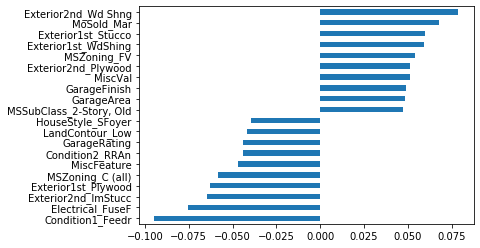

In [25]:
#Alpha is the parameter to tune in Ridge Regression. Choose values of alpha
model_ridge = RidgeCV(alphas = [25, 10, 5, 1, 0.1, .05, .01, 0.001]).fit(train, y)
print(rmse_train(model_ridge).mean())
#print(rmse_test(model_ridge).mean())

#See what alpha was used
ridge_alpha = model_ridge.alpha_
print(ridge_alpha)

#Try finding a better alpha
new_ridge = RidgeCV(alphas = [ridge_alpha * .6, ridge_alpha * .75, ridge_alpha * .9, 
                              ridge_alpha * 1.1, ridge_alpha * 1.25, ridge_alpha * 1.5, 
                              ridge_alpha * 1.75, ridge_alpha * 2]).fit(train, y)
print(rmse_train(new_ridge).mean())
#print(rmse_test(new_ridge).mean())
new_alpha = new_ridge.alpha_
print(new_alpha)

#Show important features
features = model_ridge.coef_
features = pd.Series(features, index = train.columns)
best_worst_feat = pd.concat([features.sort_values().head(10), features.sort_values().tail(10)])

best_worst_feat.plot(kind = 'barh')
plt.show()

In [26]:
#Lasso Regression
model_lasso = LassoCV(alphas = [25, 10, 5, 1, 0.1, .05, .01, 0.001]).fit(train, y)
lasso_alpha = model_lasso.alpha_
print(lasso_alpha)
new_lasso = LassoCV(alphas = [lasso_alpha * .6, lasso_alpha * .75, lasso_alpha * .9, lasso_alpha * 1.1,
                              lasso_alpha * 1.25, lasso_alpha * 1.5, lasso_alpha * 1.75]).fit(train, y)
new_alpha = new_lasso.alpha_
print(new_alpha)

print(rmse_train(model_lasso).mean())
#print(rmse_test(model_lasso).mean())
print(rmse_train(new_lasso).mean())
#print(rmse_test(new_lasso).mean())

25.0
43.75
0.40240544236682474
0.40240544236682474


In [27]:
y_pred = new_lasso.predict(test)
y_pred = np.exp(y_pred)



In [28]:
elastic_model = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1], cv = 5, normalize = False).fit(train, y)
print(rmse_train(elastic_model).mean())

elastic_pred = np.exp(elastic_model.predict(test))
#submission = pd.DataFrame(y_pred, index = tests['Id'], columns = ['SalePrice'])
#submission.to_csv('submission.csv')

0.40240544236682474
